In [11]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup
import re
import gzip
import urllib.request

In [12]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Julia_(programming_language)')

In [13]:
text = response.read()

In [14]:
text = BeautifulSoup(text, 'lxml')

In [15]:
text = text.get_text()
text

'\n\n\nJulia (programming language) - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJulia (programming language)\n\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nHigh-performance dynamic programming language\n\n\nJuliaParadigmMulti-paradigm: multiple dispatch (primary paradigm), procedural, functional, meta, multistaged[1]Designed\xa0byJeff Bezanson, Alan Edelman, Stefan Karpinski, Viral B. ShahDeveloperJeff Bezanson, Stefan Karpinski, Viral B. Shah, and other contributors[2][3]First\xa0appeared2012; 8\xa0years ago\xa0(2012)[4]Stable release1.5.2[5]\n   / 24\xa0September 2020; 19\xa0days ago\xa0(2020-09-24)Preview release1.6.0-DEV with daily updates (and 1.0.6[6] being worked on)\n   \nTyping disciplineDynamic, nominative, parametric, optionalImplementation languageJulia, C, C++, Scheme, LLVM[7]PlatformTier\xa01: x86-64, IA-32, 64-bit ARM, CUDA/Nvidia GPUs Tier\xa02: Windows 32-bit (64-bit is tier 1) Tier\xa03: 32-bit ARM, Pow

In [16]:
text = text.translate(str.maketrans('\n\r\t', '   '))
text

'   Julia (programming language) - Wikipedia                               Julia (programming language)  From Wikipedia, the free encyclopedia    Jump to navigation Jump to search High-performance dynamic programming language   JuliaParadigmMulti-paradigm: multiple dispatch (primary paradigm), procedural, functional, meta, multistaged[1]Designed\xa0byJeff Bezanson, Alan Edelman, Stefan Karpinski, Viral B. ShahDeveloperJeff Bezanson, Stefan Karpinski, Viral B. Shah, and other contributors[2][3]First\xa0appeared2012; 8\xa0years ago\xa0(2012)[4]Stable release1.5.2[5]    / 24\xa0September 2020; 19\xa0days ago\xa0(2020-09-24)Preview release1.6.0-DEV with daily updates (and 1.0.6[6] being worked on)     Typing disciplineDynamic, nominative, parametric, optionalImplementation languageJulia, C, C++, Scheme, LLVM[7]PlatformTier\xa01: x86-64, IA-32, 64-bit ARM, CUDA/Nvidia GPUs Tier\xa02: Windows 32-bit (64-bit is tier 1) Tier\xa03: 32-bit ARM, PowerPC, AMD GPUs. Also has web browser support (fo

In [17]:
text.index('http')

43554

In [18]:
text = re.sub(r'http\S+', '', text)

In [19]:
text.index('http')

ValueError: substring not found

In [20]:
text = text.lower()

In [21]:
text

'   julia (programming language) - wikipedia                               julia (programming language)  from wikipedia, the free encyclopedia    jump to navigation jump to search high-performance dynamic programming language   juliaparadigmmulti-paradigm: multiple dispatch (primary paradigm), procedural, functional, meta, multistaged[1]designed\xa0byjeff bezanson, alan edelman, stefan karpinski, viral b. shahdeveloperjeff bezanson, stefan karpinski, viral b. shah, and other contributors[2][3]first\xa0appeared2012; 8\xa0years ago\xa0(2012)[4]stable release1.5.2[5]    / 24\xa0september 2020; 19\xa0days ago\xa0(2020-09-24)preview release1.6.0-dev with daily updates (and 1.0.6[6] being worked on)     typing disciplinedynamic, nominative, parametric, optionalimplementation languagejulia, c, c++, scheme, llvm[7]platformtier\xa01: x86-64, ia-32, 64-bit arm, cuda/nvidia gpus tier\xa02: windows 32-bit (64-bit is tier 1) tier\xa03: 32-bit arm, powerpc, amd gpus. also has web browser support (fo

In [22]:
text = text.translate(str.maketrans("\'", "'"))
text                             
                                    

'   julia (programming language) - wikipedia                               julia (programming language)  from wikipedia, the free encyclopedia    jump to navigation jump to search high-performance dynamic programming language   juliaparadigmmulti-paradigm: multiple dispatch (primary paradigm), procedural, functional, meta, multistaged[1]designed\xa0byjeff bezanson, alan edelman, stefan karpinski, viral b. shahdeveloperjeff bezanson, stefan karpinski, viral b. shah, and other contributors[2][3]first\xa0appeared2012; 8\xa0years ago\xa0(2012)[4]stable release1.5.2[5]    / 24\xa0september 2020; 19\xa0days ago\xa0(2020-09-24)preview release1.6.0-dev with daily updates (and 1.0.6[6] being worked on)     typing disciplinedynamic, nominative, parametric, optionalimplementation languagejulia, c, c++, scheme, llvm[7]platformtier\xa01: x86-64, ia-32, 64-bit arm, cuda/nvidia gpus tier\xa02: windows 32-bit (64-bit is tier 1) tier\xa03: 32-bit arm, powerpc, amd gpus. also has web browser support (fo

In [23]:
small = "I wouldn't recommend this movie"

import contractions

In [24]:
contractions.fix(small)

'I would not recommend this movie'

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
[word for word in small.split() if word not in stopwords]

['I', 'recommend', 'movie']

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
small = 'I am thinking of not recommending this movie'

In [29]:
[lemmatizer.lemmatize(w) for w in small.split()]

['I', 'am', 'thinking', 'of', 'not', 'recommending', 'this', 'movie']

In [30]:
lemmatizer.lemmatize('running')

'running'

In [31]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))

cat
cactus
goose
rock


In [32]:
import gensim

In [33]:
import gensim
import gensim.test.utils as gtu

In [34]:
reviews = gzip.open('chicago.txt.gz', 'rb').readlines()

In [35]:
len(reviews)

18231

In [36]:
reviews[0]

b'Sep 21 2009 \tSlum\tNot only are the rooms jacked up but the Manager of the Building is total lacking customer service skills and has no respect for heterosexual people obviously. I had never met this guy before and told him about my shower not working in my room in which I paid for a private room with shower and he acted like a kid, stating &quot;you can leave when your rent is up&quot;. My rent is up on Tuesday, at noon, and I definitely would be out of the building. If Abbott wants its hotel to improve, it first must rid of the manager. And the next time a paying customer states they shower is not working the Manager should just say I will have maintenance take a look at the situation and we will have an answer for you when you get back. Belmont is a historical place and ABBOTT HOTEL must shape itself around the Beauty Belmont holds instead of having a Bum Manager run and ruin ABBOTTS Hotel. GET RID OF THE MANAGER! Once you do that, I think the place will get better ratings.\t\r\n

In [37]:
reviews = [gensim.utils.simple_preprocess(review) for review in reviews]

In [38]:
' '.join(reviews[0])

'sep slum not only are the rooms jacked up but the manager of the building is total lacking customer service skills and has no respect for heterosexual people obviously had never met this guy before and told him about my shower not working in my room in which paid for private room with shower and he acted like kid stating quot you can leave when your rent is up quot my rent is up on tuesday at noon and definitely would be out of the building if abbott wants its hotel to improve it first must rid of the manager and the next time paying customer states they shower is not working the manager should just say will have maintenance take look at the situation and we will have an answer for you when you get back belmont is historical place and abbott hotel must shape itself around the beauty belmont holds instead of having bum manager run and ruin abbotts hotel get rid of the manager once you do that think the place will get better ratings'

In [39]:
model = gensim.models.Word2Vec(reviews, size=200, window=10, min_count=2)

In [40]:
model.train(reviews, total_examples=len(reviews), epochs=50)

(110047993, 152103150)

In [41]:
model.wv.most_similar(positive=['love'])

[('loved', 0.5491419434547424),
 ('enjoy', 0.4315618872642517),
 ('liked', 0.3963712453842163),
 ('adore', 0.3936493992805481),
 ('prefer', 0.3900178074836731),
 ('favorite', 0.38210171461105347),
 ('someday', 0.35387122631073),
 ('gorgeous', 0.348747193813324),
 ('enjoyed', 0.34872281551361084),
 ('luv', 0.3465542793273926)]

In [42]:
import sklearn.manifold as sm

In [43]:
find_ones_like = ['love', 'like', 'hate', 'awful']
similars = [[word for (word, sim) in model.wv.most_similar(w, topn=20)] for w in find_ones_like]

In [44]:
similars

[['loved',
  'enjoy',
  'liked',
  'adore',
  'prefer',
  'favorite',
  'someday',
  'gorgeous',
  'enjoyed',
  'luv',
  'appreciate',
  'wonderful',
  'esperienza',
  'delightful',
  'fabulous',
  'ncie',
  'fantastic',
  'favourite',
  'perfect',
  'recommend'],
 ['inconsiderately',
  'judged',
  'recognize',
  'unsafe',
  'disinfect',
  'gouged',
  'patronized',
  'flashy',
  'compelled',
  'skinny',
  'begrimed',
  'roughing',
  'exclusive',
  'undone',
  'bother',
  'closely',
  'amplified',
  'obligated',
  'rustic',
  'wondering'],
 ['greedy',
  'appreciate',
  'rare',
  'guess',
  'normally',
  'usually',
  'knows',
  'understand',
  'why',
  'blame',
  'focus',
  'love',
  'know',
  'ghostly',
  'happens',
  'dodgy',
  'appalling',
  'fault',
  'gimmicks',
  'risky'],
 ['horrible',
  'terrible',
  'guter',
  'ok',
  'smelly',
  'disgusting',
  'incredible',
  'unpleasant',
  'poor',
  'bad',
  'horrific',
  'adored',
  'uncomfortable',
  'lousy',
  'awfull',
  'urine',
  'brok

In [45]:
similars_vecs = [[model.wv[w] for w in group] for group in similars]

In [46]:
len(similars_vecs)

4

In [47]:
vecs = np.array(similars_vecs)
vecs.shape

(4, 20, 200)

In [48]:
n_clusters, n_per_cluster, n_dim = vecs.shape

In [49]:
tsne_model = sm.TSNE(perplexity=10, n_components=2, init='pca', n_iter=8000)
points = tsne_model.fit_transform(vecs.reshape(n_clusters * n_per_cluster, n_dim))
points = points.reshape(n_clusters, n_per_cluster, 2)

<IPython.core.display.Javascript object>


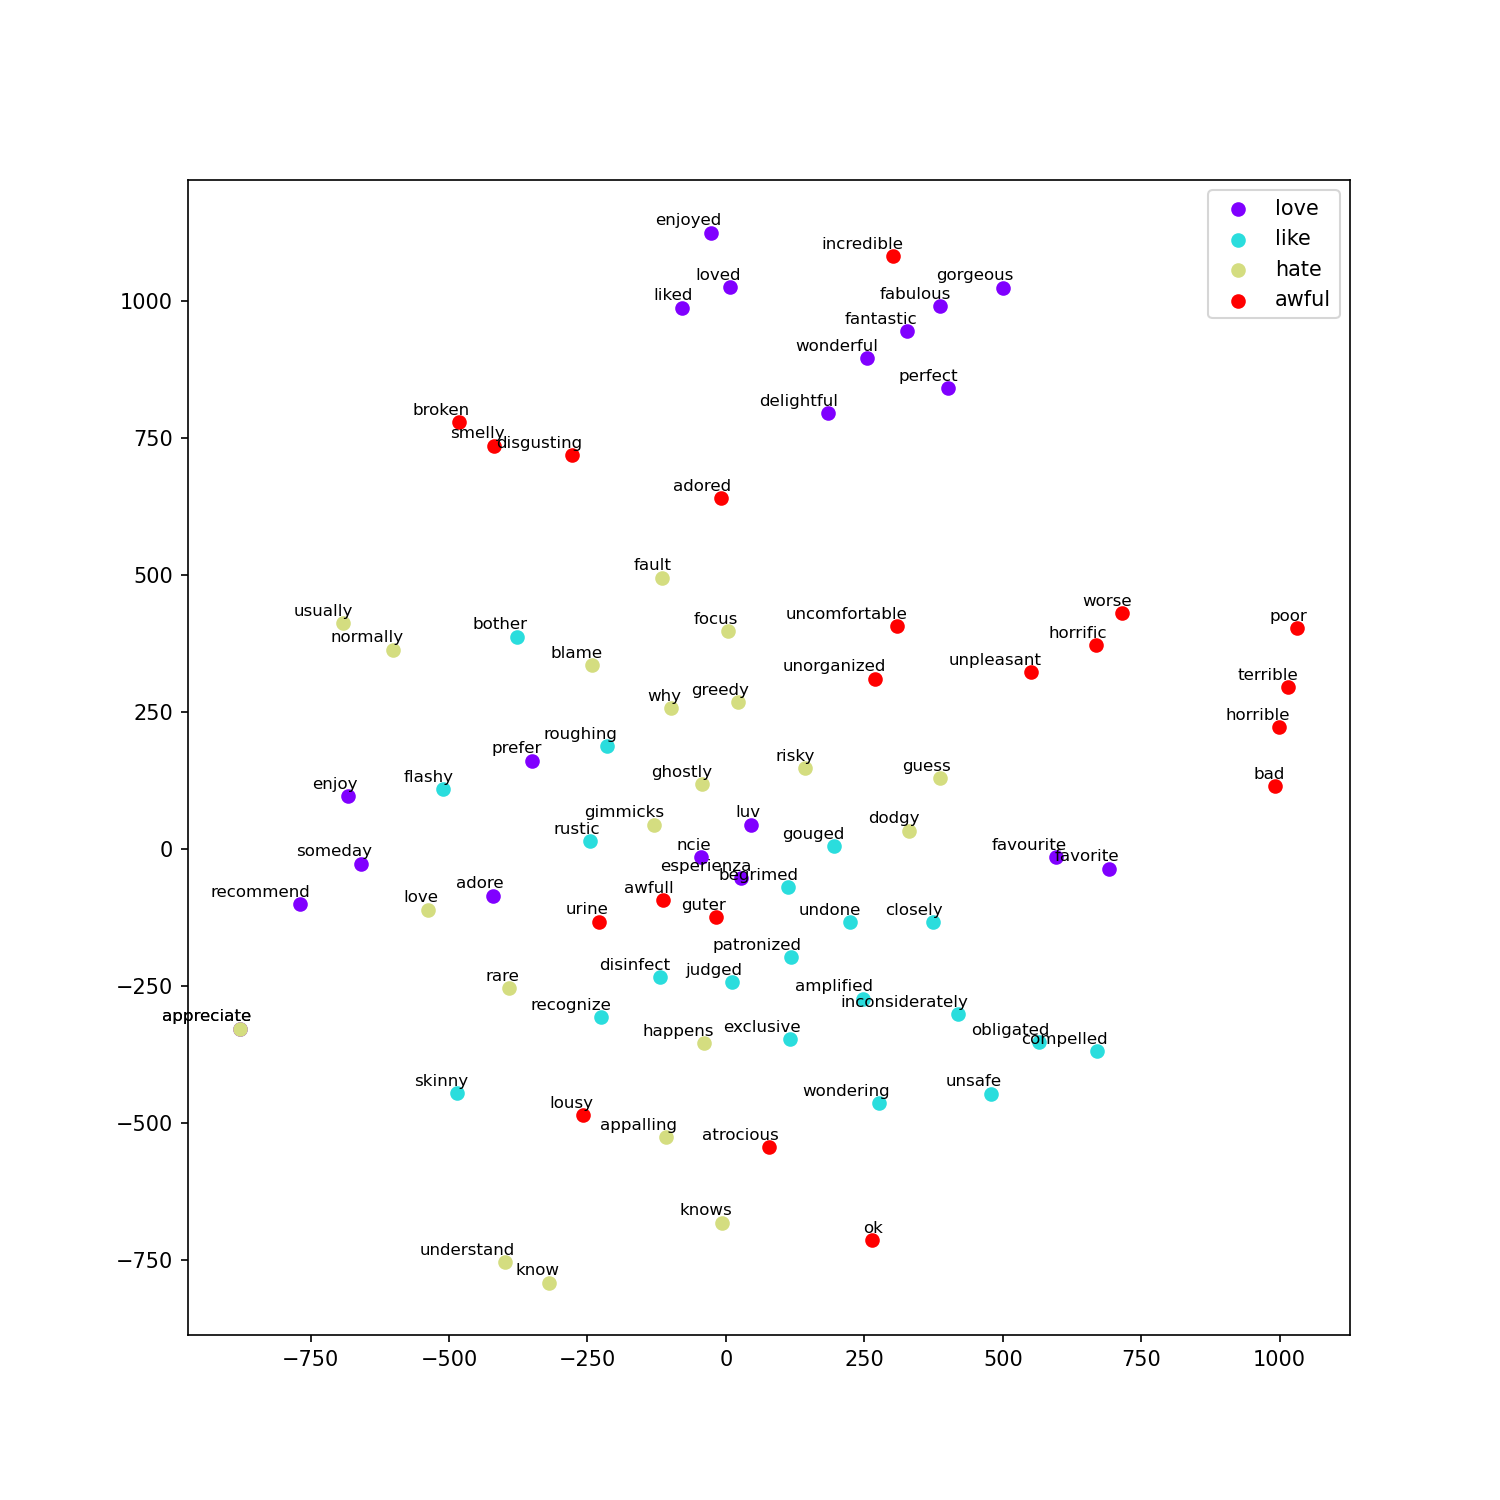

In [50]:
import matplotlib.cm as cm
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
for label, vectors, words, color in zip(find_ones_like, points, similars, colors):
    x = vectors[:, 0]
    y = vectors[:, 1]
    plt.scatter(x, y, color=color, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(x[i], y[i]), xytext=(5, 2),
                    textcoords='offset points', ha='right', va='bottom', size=8)
plt.legend()
plt.show()